# Titanic o maior!

O navio Titanic foi lançado ao mar em 10 de abril de 1912 para ser o mais luxuoso e mais seguro da sua época e assim gerou lendas de o 'inafundável'. Titanic foi realmente o maior, porém o maior desastre naval. O navio possuia um requinte que dispensa comentários destinado a primeira classe, devido a divisão de classes econômicas da época a segunda e terceira classe estavam abaixo da proa do navio. No dia 15 de abril ocorre o acidente até hoje inesquecível e eternizado pela arte, sem botes salva-vidas para todos, mesmo atendendo as normas marítimas naquela época, 1514 morreram. Foi acordado pela tripulação a convenção internacional de priorizar mulheres e crianças durante a evacuação do navio. Dados incompletos adotados para o estudos dos fatos sobre as pessoas que estavam a bordo nos revela fatos curiosos e que condizem com informações dos sobreviventes. Algumas perguntas foram criadas para que possamos estudar o arquivo de dados disponibilizado pela Udacity contendo informações de apenas 891 passageiros.

## Perguntas a serem respondidas:

1. Quantos passageiros haviam a bordo do Titanic?
2. Quantos homens e mulheres haviam a bordo?
3. Quantas homens e mulheres haviam em cada classe do navio?
4. Quantas mulheres e homens sobreviveram?
5. Qual a porcentagem de sobreviventes em cada classe do navio?
6. Qual a distribuição de idade entre os sobreviventes?
7. Quantas crianças menores de 5 anos de idade sobreviveram?
8. Qual o mais velho, mais novo e a média de idade entre os sobreviventes?
9. Qual o valor médio e máximo das tarifas em cada classe?
10. Qual o valor médio dos tíquetes de sobreviventes em cada classe do navio?
11. Qual o valor médio dos tíquetes para homens e mulheres em cada classe?




Importação de bibliotecas e leitura do arquivo *csv* contendo as informações das pessoas a bordo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic-data-6.csv', sep=',')

Dimensões do dataset.

In [2]:
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[1])

Linhas:  891
Colunas:  12


Vamos apresentar parte dos dados a seguir para que possamos nos habituar como estão organizados os dados.

In [3]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Vamos buscar informações sobre quantidade e tipo de dados em cada coluna.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Vendo como os títulos de cada coluna são chamados,  tentamos facilitar o melhor entendimento alterando os títulos de algumas colunas e deixamos todos os títulos em letras minúsculas para melhor agilidade de manipulação dos dados.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.rename(columns={'survived':'sobreviveu', 'name':'nome', 'sex':'sexo', 'age':'idade', 'fare':'tarifa', 
                   'cabin':'cabine', 'embarked':'embarque'}, inplace=True)

In [8]:
df.columns

Index(['passengerid', 'sobreviveu', 'pclass', 'nome', 'sexo', 'idade', 'sibsp',
       'parch', 'ticket', 'tarifa', 'cabine', 'embarque'],
      dtype='object')

Como não iremos visualizar dado por dado, melhor é verificar a existência de linhas duplicados no nosso data set.

In [9]:
df.duplicated().sum()

0

#### Dicionário dos dados:
 Descrevendo o que os item desse dataset significa para melhor interpretamos os dados.
 
 **passengerid** - identificação númerica do passageiro;
 **sobreviveu** - se o passageiro sobreviveu ao naufrágio (0 = não sobreviveu / 1 = sobreviveu);
 **pclass** - classe ao qual o passageiro estava viajando (1 = primeira classe / 2 = segunda classe / 3 = terceira classe);
 **nome** - nome do passageiro;
 **sexo** - sexo do passageiro;
 **idade** - idade do passageiro;
 **sibsp** - irmãos ou cônjuge a bordo do navio;
 **parch** - pais ou filhos a bordo do navio;
 **ticket** - número do ticket;
 **tarifa** - valor da passagem;
 **cabine** - número da cabine de viagem;
 **embarque** - local de embarque do passageiro;



Em nossa apresentação prévia dos dados anteriormente visualizamos alguns itens faltando (NaN), buscar estes itens nulos é de suma importância para decidirmos a necessidade de eliminação ou preenchimento destes dados com o valor mais adequado. 
#### **Limpeza dos dados** antes de iniciarmos as respostas dos nossos questionamentos.

In [10]:
df.isnull().sum()

passengerid      0
sobreviveu       0
pclass           0
nome             0
sexo             0
idade          177
sibsp            0
parch            0
ticket           0
tarifa           0
cabine         687
embarque         2
dtype: int64

Considerando que a coluna 'cabine' possui muitos itens faltando e as colunas 'sibsp', 'parch' e 'ticket' não serão úteis neste momento para nosso estudo, excluiremos essas colunas.

In [11]:
df.drop(['cabine', 'parch', 'sibsp', 'ticket'], axis=1, inplace=True)

Alguns outros dados como *'idade'* e *'embarque'* possuem dados faltando, poderiamos aplicar a idade média para homens e idade média para mulheres de modo a não influenciar nas respostas, mas optamos por mantê-los ausentes e lembrar de não considera-los quando utilizá-los.

In [12]:
def pizza(col, tit, lab):
    grafico = df[col].value_counts().plot.pie(title=tit, labels=lab, startangle=90, autopct='%1.1f%%', label='', explode=(0.1, 0), shadow=True)
    return grafico

Criada a função *pizza* na qual podemos utilizar várias vezes para apresentar um gráfico simples com seu percentual no modo pizza.

* **Descrição:**
    *Está função exibe o gráfico tipo pizza com seus respectivos percentuais para um data frame df.*

* **Função:**
    *pizza(col, tit, lab)*

* **Parâmetros de entrada:**

    col: *Inserir título tipo string referente a coluna desejada no data frame df.*
    
    tit: *Inserir título do tipo string para o gráfico.*
    
    lab: *Entre com os títulos desejavéis do tipo string para cada item da coluna selecionada na ordem decrescente do itens.*


* **Parâmetros de saída:**
    *Gráfico do tipo pizza.*


01. Mostraremos a distribuição de sobreviventes e não sobreviventes e o que isso representa em percentual. 

In [13]:
df.pivot_table('passengerid', ['sobreviveu'], aggfunc='count')

,passengerid
sobreviveu,
0,549
1,342


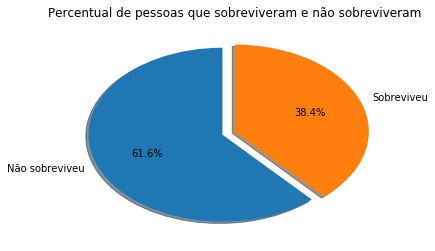

In [14]:
pizza('sobreviveu', 'Percentual de pessoas que sobreviveram e não sobreviveram', ('Não sobreviveu','Sobreviveu'))
plt.savefig('fig_1.jpg')

Uma grande percentual, 61.6%, das pessoas que embarcaram no Titanic não sobreviveram ao acidente.

2. Em seguida vamos obter os valores de homens e mulheres a bordo.

In [15]:
df.pivot_table('passengerid', ['sexo'], aggfunc='count')

,passengerid
sexo,
female,314
male,577


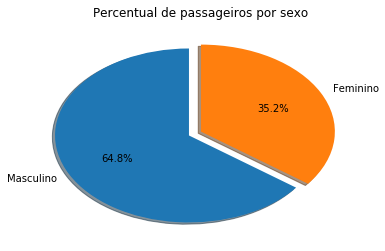

In [16]:
pizza('sexo', 'Percentual de passageiros por sexo', ('Masculino', 'Feminino'))
plt.savefig('fig_2.jpg')

Dos 891 passageiros a bordo do Titanic 577 eram do sexo masculino, representando 64,8% do total de passageiros, enquanto as mulheres apenas 35,2%.

3. Descobrindo a distribuiçao de cada sexo dentre as classes ecônomicas a bordo.

In [17]:
df.pivot_table('passengerid', ['sexo'], 'pclass', aggfunc='count')

pclass,1,2,3
sexo,,,
female,94,76,144
male,122,108,347


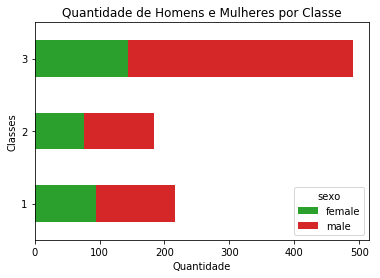

In [18]:
df.pivot_table('passengerid', 'pclass', ['sexo'], aggfunc='count').sort_index().plot(kind='barh', color=('tab:green', 'tab:red'),
                                                                       stacked=True, 
                                                                        title='Quantidade de Homens e Mulheres por Classe')
plt.xlabel('Quantidade')
plt.ylabel('Classes')
plt.savefig('fig_3.jpg')  

Os homens são predominantes nas 3 classes apresentadas, mais um número mais expressivo se encontra na 3a classe, onde muitos estavam indo em busca de novas oportunidades de vida.

4. Conseguimos identificar o que é relatado pelos sobreviventes sobre as prioridades para embarque nos botes salva-vidas quando avaliamos os números de sobreviventes de cada sexo.

In [19]:
df.query('sobreviveu == 1').groupby('sexo').count()['sobreviveu']

sexo
female    233
male      109
Name: sobreviveu, dtype: int64

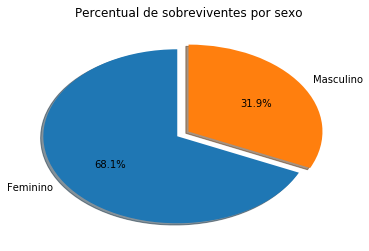

In [20]:
df[df['sobreviveu'] == 1].groupby('sexo').count()['sobreviveu'].plot.pie(title='Percentual de sobreviventes por sexo', 
                                                                      labels=('Feminino', 'Masculino'), 
                                                                       startangle=90, autopct='%1.1f%%', label='',
                                                                      explode=(0.1, 0), shadow=True)
plt.savefig('fig_4.jpg')  

Os 341 sobreviventes eram formados por 233 mulheres e 109 homens, números esses que nos revela 68.1% de mulheres entre os sobreviventes e que realmente as mulheres foram priorizadas durante o salvamente. Fatos contados nos revela que muitos também se negaram a embarcar nos botes para ficar a deriva no mar gelado no aguardo de salvamente, fotos divulgadas mostram que alguns botes não estavam totalmente cheios e isso poderia ter salvos mais 300 vidas aproximadamente.

5. Será que a tripulação foi ética ao ponto de salvar as pessoas independente de suas devidas classes sociais? Ou teria havido escolhas que a sociedade condenaria nos dias de hoje e pelos seus familiares? Vamos avaliar as porcentagens de cada classe e tirar nossas conclusões.

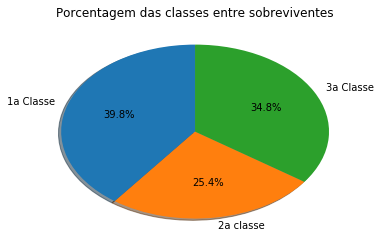

In [21]:
df.query('sobreviveu == 1').groupby('pclass').count()['sobreviveu'].plot.pie(title='Porcentagem das classes entre sobreviventes', 
                                                                           labels=('1a Classe', '2a classe', '3a Classe'), 
                                                                           startangle=90, autopct='%1.1f%%', label='', 
                                                                           shadow=True)
plt.savefig('fig_5.jpg')  

Não é tão evidente através do gráfico acima a discriminação para salvar ou não, pois a primeira classe realmente foi o maior percentual com 39.8%, porém a 3a classe teve um número maior de sobreviventes em relação a segunda classe, 34,8% da 3a classe contra 25,4% da 2a classe. Devemos lembrar também que a 1a classe estava mais próximo aos botes enquanto 2a e 3a classes estavam abaixo da proa, o que pode ter dificultado a chegada até os botes.

Mas quando olhamos os percentuais de cada classe entre os não sobreviventes, fica mais fácil ver a realidade do que ocorreu referente ao nível social dos que estavam a bordo do Titanic.

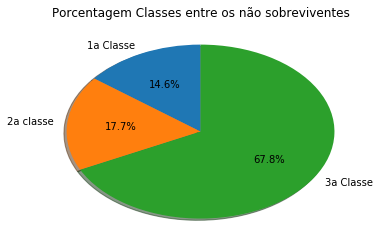

In [22]:
df.query('sobreviveu == 0').groupby('pclass').count()['sobreviveu'].plot.pie(title='Porcentagem Classes entre os não sobreviventes', 
                                                                           labels=('1a Classe', '2a classe', '3a Classe'), 
                                                                           startangle=90, autopct='%1.1f%%', label='', 
                                                                           shadow=True)
plt.savefig('fig_6.jpg')  

6. É interessante vermos a distribuição de idade entre os sobreviventes.

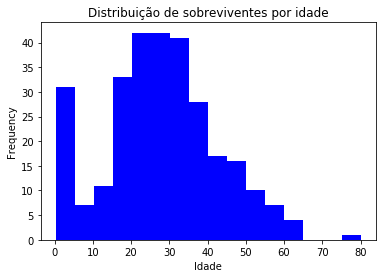

In [23]:
df.query('sobreviveu == 1')['idade'].plot.hist(title='Distribuição de sobreviventes por idade', color='b', bins=16)
plt.xlabel('Idade')
plt.savefig('fig_7.jpg')  

Vemos que existe uma grande concentração de criancas menores de 5 anos  e uma concentração alta de sobreviventes na faixa de 15 a 40 anos de idade.

7. Tendo visto uma grande quantidade de crianças menores de 5 anos sobreviventes, vamos avaliar os números sobre crianças sobreviventes menores de 5 anos.

In [24]:
df[df.idade <= 5]['sobreviveu'].value_counts()

1    31
0    13
Name: sobreviveu, dtype: int64

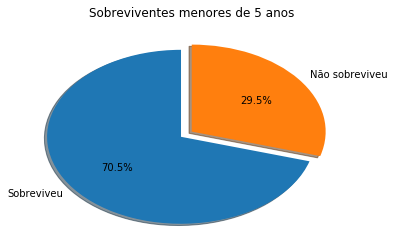

In [25]:
df['menor_5'] = df[df.idade <= 5]['sobreviveu']
pizza('menor_5', 'Sobreviventes menores de 5 anos', ('Sobreviveu', 'Não sobreviveu'))
df.drop('menor_5', axis=1, inplace=True)
plt.savefig('fig_8.jpg')

Uma grande maioria das crianças até 5 anos de idade foram salvas. Representando 70,5% de sobreviventes até 5 anos.

8. Vamos descobrir qual foi a idade do sobrevivente mais novo, mais velho e qual a média de idade entre eles.

In [26]:
df.query('sobreviveu == 1')['idade'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: idade, dtype: float64

Com a ajuda do pandas fica fácil descobrir informações como média, mínimo, máximo, desvio padrão e mediana. A média de idade é de 28 anos entre os sobreviventes, o sobrevivente mais jovem possuia apenas 0,42 anos de idade e o sobrevivente mais velho 80 anos de idade.

9. Descobrindo o valor médio e máximo que as pessoas pagaram em cada classe.

In [27]:
df.groupby('pclass')['tarifa'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Com a tabela acima é possível checar que em todas as classes teve pessoas viajando sem cobrança enquanto outras pagaram 512,32 no valor da tarifa para viajar na primeira classe. A média das tarifas de 1a, 2a e 3a classe foram 84,15, 20,66 e 13,67 respectivamente.

10. Entre os sobreviventes podemos extrair a informação de valor médio das tarifas cada classe econômica.

In [28]:
df.query('sobreviveu == 1').groupby('pclass')['tarifa'].mean()

pclass
1    95.608029
2    22.055700
3    13.694887
Name: tarifa, dtype: float64

Enquanto a média da tarifa paga pelos sobreviventes da 1a classe foi 95,61, a 2a classe pagou 22,06 e a 3a classe 13,69. A diferença entre as tarifas médias dos sobreviventes chega a aproximadamente 7 vezes.

11. Olhando os valores médios pagos pelas mulheres e pelos homens em cada classe descobriremos as diferenças ou poder aquisitivo maior que os homens ou mulheres possuiam na época.

In [29]:
df.pivot_table('tarifa', ['sexo'], 'pclass', aggfunc='mean')

pclass,1,2,3
sexo,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


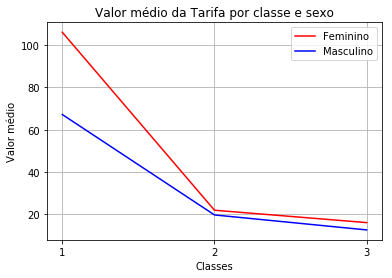

<Figure size 432x288 with 0 Axes>

In [30]:
df_f = df.query('sexo == "female"').groupby('pclass')['tarifa'].mean()
df_m = df.query('sexo == "male"').groupby('pclass')['tarifa'].mean()
classe = df['pclass'].unique()

plt.plot(df_f, 'r', label='Feminino')
plt.plot(df_m, 'b', label='Masculino')
plt.title('Valor médio da Tarifa por classe e sexo')
plt.xlabel('Classes')
plt.ylabel('Valor médio')
plt.xticks(classe)
plt.legend()
plt.grid(True)

plt.show()
plt.savefig('fig_9.jpg')

A média de valores pagos para embarcar no Titanic pelas mulheres foi superior em todas as classes. A primeira classe, as mulheres pagaram em média valores bem superior aos homens, o que nos revela que as mulheres que utilizavam esse meio de locomação possuiam maior poder aquisitivo ou por motivos de preconceito que existia na época eram exigidas a pagar um valor maior. 

## Conclusão

Com este projeto proposto para analise dos dados exploratório de sobreviventes e aqueles que não tiveram a sorte de sobreviver, podemos verificar que apenas 38,4% das pessoas a bordo sobreviveram, ou seja, em números apenas 342 dos 891 sobreviveram.

Uma informação agradável é que as crianças menores de 5 anos foram em sua grande maioria salvas, representando uma taxa maior que 2/3 das presentes na embarcação.

As mulheres também tiveram sua prioridade durante a tragédia para deixar o navio, 68,1% das mulheres a bordo conseguiram sobreviver ao acidente.

Outros dados foram extraidos atráves de faixa etária e classes do navio como é possível verificar ao longo do projeto.

Poderiamos ter abordado outros pontos de vista interessantes durante o projeto, como exemplo podemos citar o local de embarque de cada pessoa, mas deixaremos para um próximo estudo.

Executar na prática os conhecimentos adquiridos durante o Nanodegree, a descoberta de novos conhecimentos para assim extrair as informações e além de tudo sobre a história de uma das maiores tragédias náuticas ocorridas foi enriquecedor. 

### Limitações

Tivemos alguns fatores que nos limitou a extrair informações ainda mais precisas, a exemplo de valores relevantes podemos citar a idade de algumas pessoas que faltavam.
        A **medida tomada** para reduzir o impacto nas análises foi de utilizar os valores não nulos, sem a necessidade de exclui-los do banco de dados. Também poderia se utilizar outros métodos para se aproximar os valores das idades faltantes, o que não foi o caso.

Caso desejassemos utilizar a lotação ocupada, cabine, pelos passageiros no navio teriamos um problema maior, pois o número de elementos faltantes é muito maior. A coluna cabine foi inutilizada e excluida do dataset.


#### Fontes:
- Kaggle
https://www.kaggle.com/c/titanic

- Stackoverflow
https://stackoverflow.com

- Python para Análise de Dados
Editora: Novatec
Autor: Wes McKinney